In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from simulation import Data, Submission, Tournament, round_names

In [2]:
# Initiate data class to get files
mw = 'M'
ncaa_data = Data(mw, dir='./input_with_data/')

# read and initialize submission class
df = pd.read_csv('./input_with_data/'+mw+'submission.csv')
submission = Submission(sub_df=df, data=ncaa_data)

# initiate a tournament object
tourney = Tournament(data=ncaa_data,submission=submission,season=2021)

# Now what can these do?
## Data class
Pass this to the other two classes. It handles retrieval of all the necessary data. Can get data for mens or womens kaggle competitions

## The Submission Class
The submission class will add some more information to your simple submission file like the round a game takes place in. It also has a method to look up predictions by team names or IDs.

In [3]:
submission.df.head(2)

,ID,Pred,PredData
0,2021_1101_1104,0.129956,87.0% chance of Alabama beating Abilene Chr
1,2021_1101_1111,0.755744,75.6% chance of Abilene Chr beating Appalachia...


more interestingly...

In [4]:
pred = submission.df.iloc[0,2]
# pred.s_dict_rev

In [5]:
submission.full_df.head(2)

,Season,Round,Team1ID,Team2ID,Pred,PredData
ID,,,,,,
2021_1101_1104,2021,3,1101,1104,0.129956,87.0% chance of Alabama beating Abilene Chr
2021_1101_1111,2021,5,1101,1111,0.755744,75.6% chance of Abilene Chr beating Appalachia...


the round names can be found in a dictionary at the top of the Python code. Now how about predictions?

In [6]:
pred = submission.get_pred_by_teams(season=2021, t1_name='Houston', t2_name='Ohio')
pred

90.4% chance of Houston beating Ohio

this predictiction class has methods to do things like randomly pick a winner based on the prediction

In [7]:
pred.get_favored(), pred.t1_id, pred.t1_name

(1222, 1222, 'Houston')

## The Tournament Class
The tournament class is built on top of the prediction classes and gives some simulation options and ways to calculate expected losses or tournament odds, like the odds to make the championship.

The first simple example is using a dictionary of game slots and winning team IDs stored in the python code to load historic tournament results to compare our submission to. I am planning on updating these dictionary values for 2022 as the tournament progresses

In [8]:
tourney.get_historic_results()

The results are loaded and below we see that Baylor beat Gonzaga to win the 2021 tournament.

In [9]:
tourney.summary_to_df().head()

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1417,W11b - UCLA,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1222,Y02 - Houston,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1116,Z03 - Arkansas,0.0,1.0,1.0,1.0,0.0,0.0,0.0


Below are the losses. I am dropping the last 4 which are play-in games. There was also one cancelled game in the 2021 tournament that is not appropriately reflected in the losses here. That game was slot `R1X4`. If we omit all of those we can perfectly match my kaggle score from last year.

In [10]:
no_play_ins = tourney.losses[:-4]
true_loss = no_play_ins.loc[~(no_play_ins.index=='R1X4')].mean()
true_loss

0.5973122375375122

Let's try some simulations - first we will just take the favored team in each slot

In [11]:
tourney.reset_tournament()
tourney.simulate_tournament('chalk') 
tourney.summary_to_df().head()


,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1228,Y01 - Illinois,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1104,W02 - Alabama,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1116,Z03 - Arkansas,0.0,1.0,1.0,1.0,0.0,0.0,0.0


or we can randomize it

In [12]:
tourney.reset_tournament()
tourney.simulate_tournament('random', seed=13) 
tourney.summary_to_df().head()

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1104,W02 - Alabama,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1361,Y06 - San Diego St,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1403,Z06 - Texas Tech,0.0,1.0,1.0,1.0,0.0,0.0,0.0


or we can run a simulation that will track our expected outcomes and losses

In [13]:
n_sim = 500
results, expected_losses = tourney.simulate_tournaments(n_sim)

Let's visualize the team performance by round from the simulation

In [ ]:

results.head(10)

NameError: name 'results' is not defined

In [ ]:
odds = results.copy()
odds.iloc[:,1:] = (results.iloc[:,1:]  / n_sim)
odds.head(10)

NameError: name 'results' is not defined

In [ ]:
odds.set_index('Team')['Championship'].plot(kind='pie')
plt.axis('equal')
plt.show()

NameError: name 'odds' is not defined

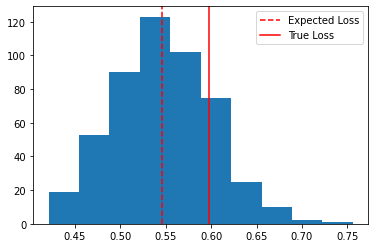

In [ ]:
plt.hist(expected_losses)
plt.axvline(np.array(expected_losses).mean(), color='r', linestyle='--', label='Expected Loss')
plt.axvline(true_loss, color='r', linestyle='-', label='True Loss')
plt.legend()

In [ ]:
submission_df = tourney.submission.full_df.copy()
submission_df.head()

,Season,Round,Team1ID,Team2ID,Pred,PredData
ID,,,,,,
2021_1101_1104,2021,3,1101,1104,0.129956,87.0% chance of Alabama beating Abilene Chr
2021_1101_1111,2021,5,1101,1111,0.755744,75.6% chance of Abilene Chr beating Appalachia...
2021_1101_1116,2021,6,1101,1116,0.167791,83.2% chance of Arkansas beating Abilene Chr
2021_1101_1124,2021,6,1101,1124,0.080781,91.9% chance of Baylor beating Abilene Chr
2021_1101_1140,2021,6,1101,1140,0.324174,67.6% chance of BYU beating Abilene Chr


In [ ]:
from scipy import stats

def check_pred(row):
    t1_id = row['Team1ID']
    t2_id = row['Team2ID']
    round = round_names.get(row['Round'])
    t1_pred = row['Pred']

    if round == 'Play-in Games':
        return t1_pred

    prev_round = round_names.get(row['Round']-1)
    t1_prev_odds = odds.loc[t1_id, prev_round]
    t2_prev_odds = odds.loc[t2_id, prev_round]

    round_odds = odds[prev_round]
    base_rate = np.mean(round_odds[round_odds!=0])
    # t1_odds = submission.loc[t1_id, prev_round]
    # t2_odds = submission.loc[t2_id, prev_round]

    t1_cr = max([(base_rate - t1_prev_odds) / base_rate, 0])
    t2_cr = max([(base_rate - t2_prev_odds) / base_rate, 0])
    cr = .5 * t1_cr + .5 * t2_cr
    final_pred = cr * .5 + t1_pred * (1 - cr)
    return final_pred

In [ ]:
submission_df.sort_values('Round')

,Season,Round,Team1ID,Team2ID,Pred,PredData,pred_new
ID,,,,,,,
2021_1216_1411,2021,0,1216,1411,0.496698,50.3% chance of TX Southern beating Hartford,0.496698
2021_1140_1233,2021,0,1140,1233,0.840303,84.0% chance of BYU beating Iona,0.840303
2021_1140_1159,2021,0,1140,1159,0.537108,53.7% chance of BYU beating Colgate,0.537108
2021_1179_1455,2021,0,1179,1455,0.577896,57.8% chance of Drake beating Wichita St,0.577896
2021_1277_1417,2021,0,1277,1417,0.428294,57.2% chance of UCLA beating Michigan St,0.428294
...,...,...,...,...,...,...,...
2021_1111_1437,2021,6,1111,1437,0.139925,86.0% chance of Villanova beating Appalachian St,0.262999
2021_1166_1216,2021,6,1166,1216,0.895676,89.6% chance of Creighton beating Hartford,0.760433
2021_1234_1411,2021,6,1234,1411,0.930792,93.1% chance of Iowa beating TX Southern,0.783546


In [ ]:
odds.loc[odds['Play-in Games']==0,'Play-in Games'] = 1
odds.iloc[:,1:] += .0001

In [ ]:
submission_df = submission.full_df
submission_df['pred_new'] = submission_df.apply(check_pred, axis=1)

In [ ]:
submission_df

,Season,Round,Team1ID,Team2ID,Pred,PredData,pred_new
ID,,,,,,,
2021_1101_1104,2021,3,1101,1104,0.129956,87.0% chance of Alabama beating Abilene Chr,0.201653
2021_1101_1111,2021,5,1101,1111,0.755744,75.6% chance of Abilene Chr beating Appalachia...,0.509949
2021_1101_1116,2021,6,1101,1116,0.167791,83.2% chance of Arkansas beating Abilene Chr,0.321037
2021_1101_1124,2021,6,1101,1124,0.080781,91.9% chance of Baylor beating Abilene Chr,0.274165
2021_1101_1140,2021,6,1101,1140,0.324174,67.6% chance of BYU beating Abilene Chr,0.468636
...,...,...,...,...,...,...,...
2021_1452_1457,2021,5,1452,1457,0.697628,69.8% chance of West Virginia beating Winthrop,0.584568
2021_1452_1458,2021,5,1452,1458,0.471957,52.8% chance of Wisconsin beating West Virginia,0.484206
2021_1455_1457,2021,6,1455,1457,0.530390,53.0% chance of Wichita St beating Winthrop,0.500307


In [ ]:
new_submission = submission_df['pred_new'].reset_index()
new_submission.columns = ['ID', 'Pred']
new_submission

,ID,Pred
0,2021_1101_1104,0.201653
1,2021_1101_1111,0.509949
2,2021_1101_1116,0.321037
3,2021_1101_1124,0.274165
4,2021_1101_1140,0.468636
...,...,...
2273,2021_1452_1457,0.584568
2274,2021_1452_1458,0.484206
2275,2021_1455_1457,0.500307
2276,2021_1455_1458,0.490619


In [ ]:
submission_new = Submission(sub_df=new_submission, data=ncaa_data)

# initiate a tournament object
tourney = Tournament(data=ncaa_data,submission=submission_new,season=2021)

In [ ]:
tourney.get_historic_results()

In [ ]:
no_play_ins = tourney.get_losses(submission_new)[:-4]
true_loss = no_play_ins.loc[~(no_play_ins.index=='R1X4')].mean()
true_loss

0.5683655595983855